In [1]:
from astropy.cosmology import FlatLambdaCDM
from astropy.units import Quantity
from slsim.lens_pop import LensPop
import numpy as np
import slsim.Sources as sources
import slsim.Deflectors as deflectors
import slsim.Pipelines as pipelines
from slsim.Sources.QuasarCatalog.quasar_pop import QuasarRate

import matplotlib.pyplot as plt
import corner

from slsim.Plots.lens_plots import LensingPlots

/home/paras/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/paras/repos/self/slsim/slsim/Plots/lens_plots.py:5: UserWarning: If you want to simulate images with Roman filters, please install the galsim module.
Note that this module is not supported on Windows
  from slsim.roman_image_simulation import simulate_roman_image


## Lensed quasar + host galaxy population

This notebook shows how to simulate lensed quasar population with/without host galaxies.

In [2]:
# define a cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)


# define a sky area
galaxy_sky_area = Quantity(value=0.1, unit="deg2")
quasar_sky_area = Quantity(value=0.1, unit="deg2")
full_sky_area = Quantity(value=0.1, unit="deg2")


# define limits in the intrinsic deflector and source population (in addition
# to the skypy config
# file)
kwargs_deflector_cut = {"band": "i", "band_max": 30, "z_min": 0.01, "z_max": 5}
kwargs_source_cut = {"z_min": 0.001, "z_max": 5.0}

In [3]:
# generate galaxy population using skypy pipeline.
galaxy_simulation_pipeline = pipelines.SkyPyPipeline(
    skypy_config=None,
    sky_area=galaxy_sky_area,
    filters=None,
)

In [4]:
# Initiate deflector population class
lens_galaxies = deflectors.AllLensGalaxies(
    red_galaxy_list=galaxy_simulation_pipeline.red_galaxies,
    blue_galaxy_list=galaxy_simulation_pipeline.blue_galaxies,
    kwargs_cut=kwargs_deflector_cut,
    kwargs_mass2light={},
    cosmo=cosmo,
    sky_area=galaxy_sky_area,
)

/home/paras/repos/self/slsim/slsim/Deflectors/all_lens_galaxies.py:54: UserWarning: Angular size is converted to arcsec because provided input_catalog_type is skypy. If this is not correct, please refer to the documentation of the class you are using
  red_galaxy_list = catalog_with_angular_size_in_arcsec(
/home/paras/repos/self/slsim/slsim/Deflectors/all_lens_galaxies.py:57: UserWarning: Angular size is converted to arcsec because provided input_catalog_type is skypy. If this is not correct, please refer to the documentation of the class you are using
  blue_galaxy_list = catalog_with_angular_size_in_arcsec(


In [5]:
# Initiate QuasarRate class to generate quasar sample.
quasar_class = QuasarRate(
    cosmo=cosmo,
    sky_area=quasar_sky_area,
    noise=True,
    redshifts=np.linspace(0.001, 5.01, 100),  # these redshifts are provided
    # to match general slsim redshift range in skypy pipeline.
)

# quasar sample without host galaxy
quasar_source = quasar_class.quasar_sample(m_min=15, m_max=30, host_galaxy=False)

# quasar sample with host galaxy
quasar_source_plus_galaxy = quasar_class.quasar_sample(
    m_min=15, m_max=30, host_galaxy=True
)

Matching quasars with host galaxies: 100%|██████████| 1047/1047 [00:14<00:00, 72.72it/s]


In [6]:
quasar_source

z,M_i,ps_mag_i
float64,float64,float64
2.6733058817920896,-23.56159296922221,22.294499960667764
2.213978540095596,-15.733631045329151,29.682027996800173
1.0334680339650517,-15.130953977703296,28.489207328329115
1.0333885180302627,-13.769868459612434,29.85016572674055
0.626425179895944,-12.983367004807313,29.463627448010413
3.348085476620237,-16.393919890186837,29.995060561569428
2.2212931759066854,-17.88485862753954,27.540867015964384
2.5808203706777983,-16.439674234346317,29.3745235340745
0.3756645038333393,-13.49125600480481,27.83379072226629


In [7]:
quasar_source_plus_galaxy

z,M_i,ps_mag_i,M,coeff,ellipticity,physical_size,stellar_mass,angular_size,mag_g,mag_r,mag_i,mag_z,mag_y,vel_disp,black_hole_mass_exponent,eddington_ratio
,,,,,,kpc,,rad,,,,,,,,
float64,float64,float64,float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2.6733058817920896,-23.56159296922221,22.294499960667764,-21.944730013933015,0.18993319463135072 .. 0.11145785053399761,0.42713010943843177,3.5372900713667264,95355301025.77167,2.153960092327377e-06,25.035816802454555,24.887157258557217,24.67559170344454,24.599294925084138,24.43104770849098,142.16821819723955,7.842125352241634,0.7665893423367447
2.213978540095596,-15.733631045329151,29.682027996800173,-17.044611422100292,0.5573984138470127 .. 0.11009548347979745,0.07813610890968799,1.614889160038956,1093303695.1698534,9.498669853894444e-07,29.910554921014025,29.62123039458573,29.413253984620802,29.164438701526016,28.889732858282343,39.432063630350754,5.402671148910463,0.15483129735729526
1.0334680339650517,-15.130953977703296,28.489207328329115,-15.707237394393866,0.36098033573247723 .. 0.09885371105008399,0.8200947757524126,1.3657882715389444,289179711.4462873,8.125751990977335e-07,28.90301869583794,28.628093635459077,28.347103093817122,27.879004710825736,27.715541903713447,35.22303761419231,5.187951725509787,0.1457841813929135
1.0333885180302627,-13.769868459612434,29.85016572674055,-14.277955034928384,0.39760000805614787 .. 0.2918024812897284,0.5452540915109657,1.9567527714366484,30022889.283019565,1.1843544211612727e-06,30.076125765208808,29.781965901418502,29.418480417615683,29.06432972577774,28.967637935615294,28.054275452036155,4.755086181665078,0.10102023340721769
0.626425179895944,-12.983367004807313,29.463627448010413,-12.80932796454804,0.13760738156345254 .. 0.2371047103713084,0.6682904157903589,0.7237050100643335,7876898.797970607,5.2694063048926e-07,30.223015941234653,29.666056495565055,29.30616926467629,29.2561856239676,29.153578219343995,23.819566887228206,4.443820621435197,0.10289197884804127
3.348085476620237,-16.393919890186837,29.995060561569428,-17.417770340093533,0.25653720214355813 .. 0.10629059576399781,0.26009706523817877,0.3404624930399301,932628763.331304,2.229202188390785e-07,30.322914282548076,29.963463370763414,29.851009563982288,29.732278848436074,29.627978961729696,38.928997299114,5.378247006196445,0.3008527114086736
2.2212931759066854,-17.88485862753954,27.540867015964384,-18.62957395070256,0.1180286025547446 .. 0.08264098391292926,0.3592916524411734,1.578441930904144,5395567186.006073,9.241464311275443e-07,28.46238523879505,28.140488162205564,27.92764698952218,27.62004021943634,27.32313993089477,50.88394300912043,5.887674030804695,0.3678766230619029
2.5808203706777983,-16.439674234346317,29.3745235340745,-18.90862578359511,0.6128458884853046 .. 0.17619758633654625,0.675064766629604,1.935153598374417,3518549414.152314,1.1691231402788956e-06,28.171348370556668,27.95726169089153,27.715444462314057,27.642362589729704,27.423725769566598,43.13133237975176,5.573243102007397,0.20025512603178844


In [8]:
# Prepare dictionary of agn variability kwargs
variable_agn_kwarg_dict = {
    "length_of_light_curve": 500,
    "time_resolution": 1,
    "log_breakpoint_frequency": 1 / 20,
    "low_frequency_slope": 1,
    "high_frequency_slope": 3,
    "standard_deviation": 0.9,
}

kwargs_quasar = {
    "variability_model": "light_curve",
    "kwargs_variability": {"agn_lightcurve", "i", "r", "g"},
    "agn_driving_variability_model": "bending_power_law",
    "agn_driving_kwargs_variability": variable_agn_kwarg_dict,
    "lightcurve_time": np.linspace(0, 1000, 500),
}

In [9]:
# Initiate source population classes.

# Point source quasar population without host galaxy
source_quasar = sources.PointSources(
    quasar_source,
    cosmo=cosmo,
    sky_area=quasar_sky_area,
    kwargs_cut=kwargs_source_cut,
    list_type="astropy_table",
    # catalog_type="skypy",
    pointsource_type="quasar",
    **kwargs_quasar,
)

# Point source quasar population with host galaxy
source_quasar_plus_galaxies = sources.PointPlusExtendedSources(
    point_plus_extended_sources_list=quasar_source_plus_galaxy,
    cosmo=cosmo,
    sky_area=quasar_sky_area,
    kwargs_cut=kwargs_source_cut,
    list_type="astropy_table",
    catalog_type="skypy",
    pointsource_type="quasar",
    extendedsource_type="single_sersic",
    **kwargs_quasar,
)

In [10]:
# Initiate LensPop class to generate lensed quasar pop. We simulate lens pop in 500
# deg^2. If you want to simulate in larger sky, change sky area to your requirement.
quasar_lens_pop = LensPop(
    deflector_population=lens_galaxies,
    source_population=source_quasar,
    cosmo=cosmo,
    sky_area=full_sky_area,
)

quasar_plus_galaxies_lens_pop = LensPop(
    deflector_population=lens_galaxies,
    source_population=source_quasar_plus_galaxies,
    cosmo=cosmo,
    sky_area=full_sky_area,
)

## Properties of the lensed quasar population

Text(0.5, 1.05, 'Quasar Source Population')

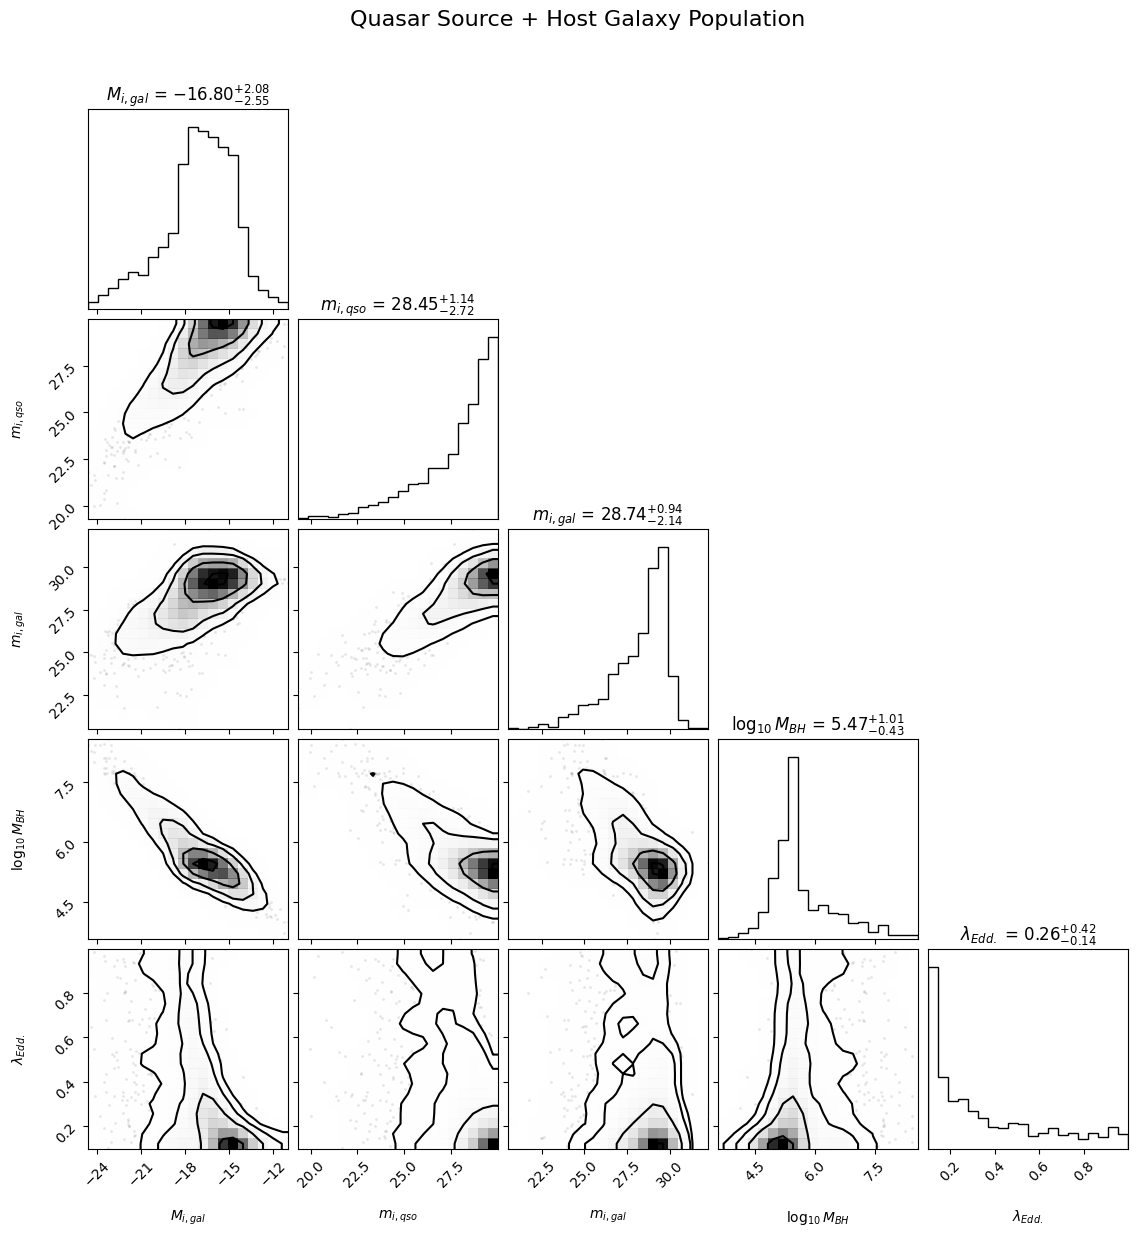

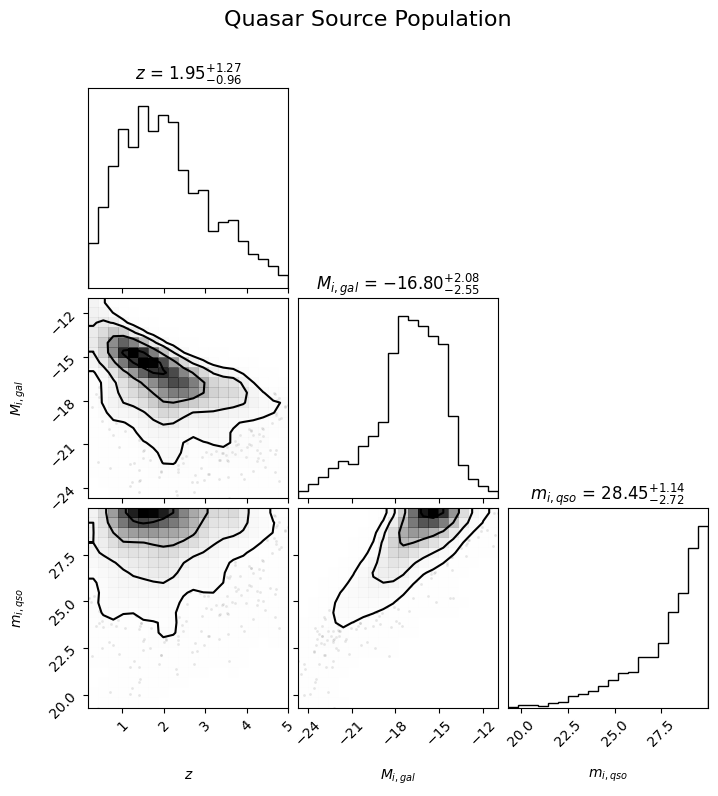

In [11]:
# we make a corner plot for both the lens populations

keys = [
    # "z",
    "M_i",
    "ps_mag_i",
    "mag_i",
    "black_hole_mass_exponent",
    "eddington_ratio",
]

key_labels = {
    "z": r"$z$",
    "M_i": r"$M_{i, gal}$",
    "ps_mag_i": r"$m_{i, qso}$",
    "mag_i": r"$m_{i, gal}$",
    "black_hole_mass_exponent": r"$\log_{10} M_{BH}$",
    "eddington_ratio": r"$\lambda_{Edd.}$",
}

data_qso_plus_gal = {key: quasar_source_plus_galaxy[key] for key in keys}

fig = corner.corner(
    data_qso_plus_gal,
    labels=[key_labels[key] for key in keys],
    # quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12},
    smooth=True,
);
fig.suptitle(
    "Quasar Source + Host Galaxy Population",
    fontsize=16,
    y=1.05,
)

data_qso_only = {key: quasar_source[key] for key in ['z', 'M_i', 'ps_mag_i']}

fig = corner.corner(
    data_qso_only,
    labels=[key_labels[key] for key in data_qso_only.keys()],
    # quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12},
    smooth=True,
);
fig.suptitle(
    "Quasar Source Population",
    fontsize=16,
    y=1.05,
)


## Plot lenses

In [ ]:
# make some cuts in the image separations and limited magnitudes of the arc
kwargs_lens_cut_plot = {
    "min_image_separation": 4,
    "max_image_separation": 30,
    "mag_arc_limit": {"g": 23, "r": 23, "i": 23},
}

quasar_plot = LensingPlots(quasar_lens_pop, num_pix=64, coadd_years=10)
quasar_plus_galaxies_plot = LensingPlots(quasar_plus_galaxies_lens_pop, num_pix=64, coadd_years=10)

keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is n

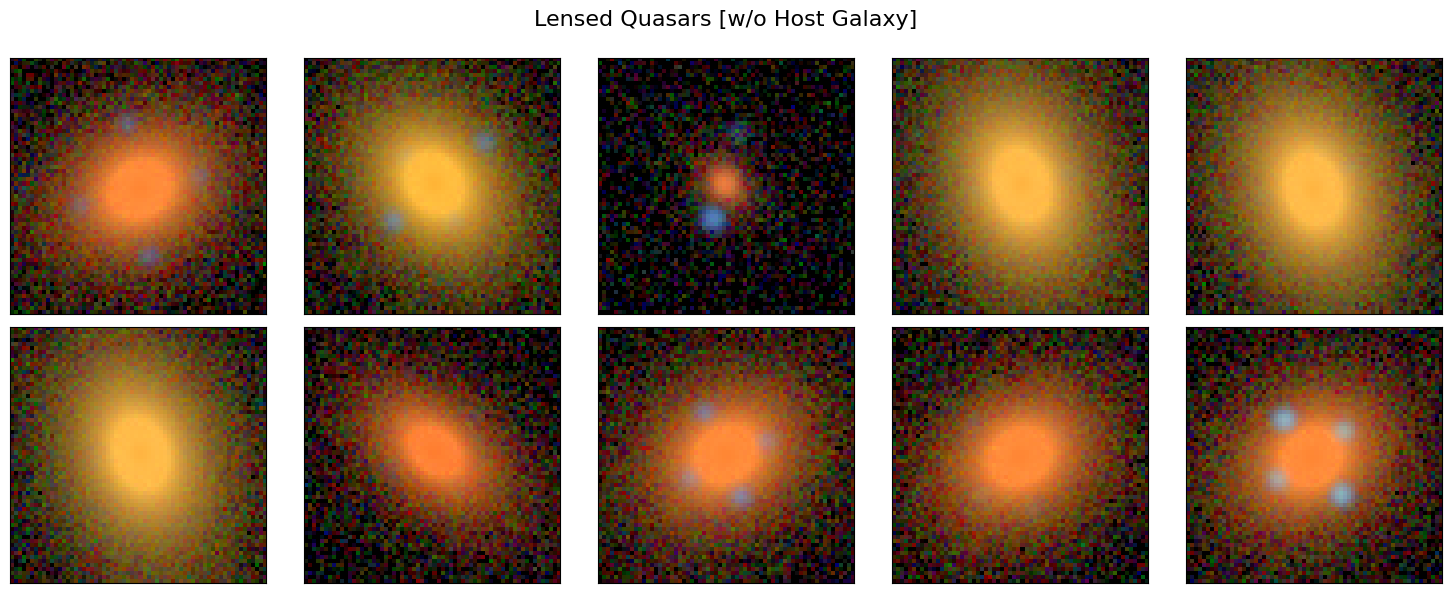

In [ ]:
# generate montage indicating which bands are used for the rgb color image
fig, axes = quasar_plot.plot_montage(
    rgb_band_list=["i", "r", "g"],
    add_noise=True,
    n_horizont=5,
    n_vertical=2,
    kwargs_lens_cut=kwargs_lens_cut_plot,
)
fig.suptitle("Lensed Quasars [w/o Host Galaxy]", fontsize=16)
fig.subplots_adjust(top=0.9)
plt.show()

keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500
keyword corona_height is not defined, using default value of: 10
keyword r_resolution is n

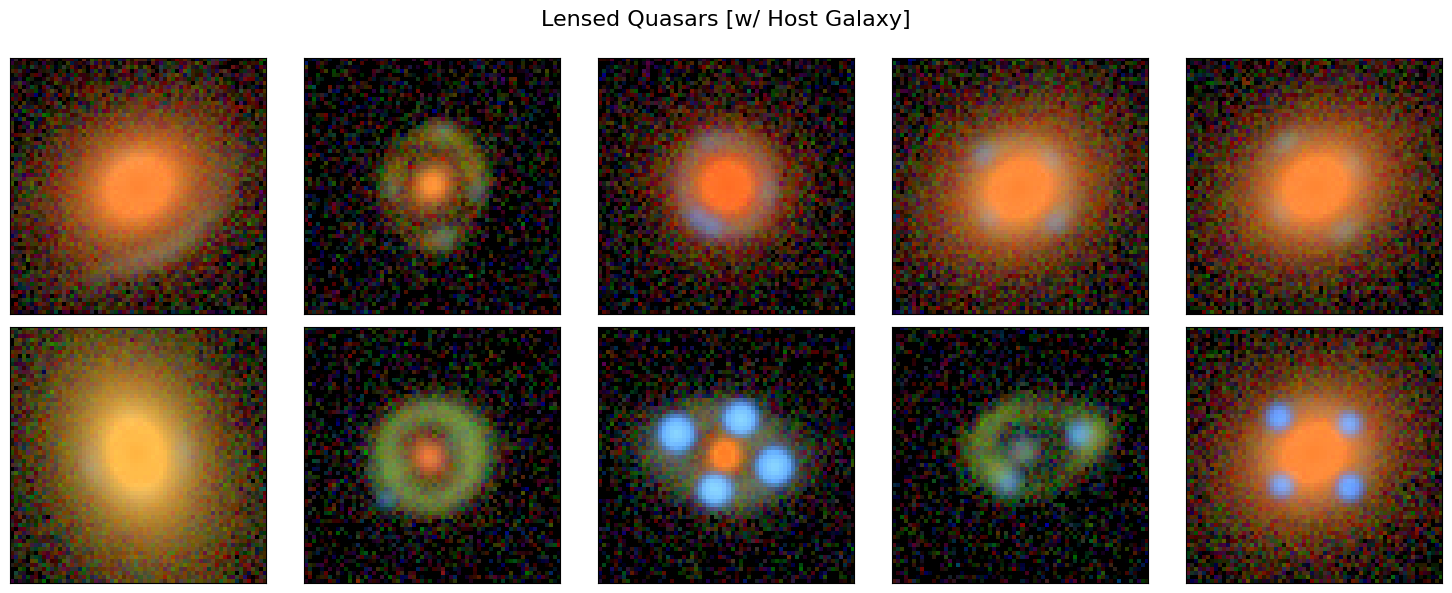

In [ ]:
# generate montage indicating which bands are used for the rgb color image
fig, axes = quasar_plus_galaxies_plot.plot_montage(
    rgb_band_list=["i", "r", "g"],
    add_noise=True,
    n_horizont=5,
    n_vertical=2,
    kwargs_lens_cut=kwargs_lens_cut_plot,
)
fig.suptitle("Lensed Quasars [w/ Host Galaxy]", fontsize=16)
fig.subplots_adjust(top=0.9)
plt.show()